# Rescaling Algorithm
## Basic Concepts
We've all run into the problem of having data points come in that are beyond the normal limits for a certain instrument i.e negative values when using an absorbance spectrometer. However, there are ways to rescale this data to a more appropriate range.

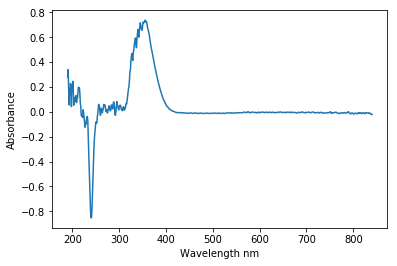

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import genfromtxt
from ipywidgets import interact
from resize import resize


%matplotlib inline

thefile = genfromtxt("UVSpectraData.csv",delimiter=",",skip_header=1)
Wavelengths = thefile.T[0]
Spectra = thefile.T[1:]

plt.plot(Wavelengths,Spectra[0])
plt.xlabel("Wavelength nm")
plt.ylabel("Absorbance")

def scalingupdate(Spec,minval,maxval):
    plt.plot(Wavelengths,Spectra[Spec],color="Red",label="Original Spectrum")
    newspectra = resize(Spectra,maxval,minval)
    plt.plot(Wavelengths,newspectra[Spec],label="Rescaled Spectrum")
    plt.xlabel("Wavelength nm")
    plt.ylabel("Absorbance")
    plt.legend()
    plt.axis([190, 500, minval, maxval])
    plt.show()


## Spectrum in need of rescaling

As you can see, this spectrum suffers from a negative absorbance, which is unwanted. We can use the following code to recale it!

# Rescaling Algorithm

## Finding zero value of the (S)pectrum 

```for x in range(len(S)):
   S[x] = S[x] - min(S)```

## Determining range of spectrum

``` 
R1 = max(S) - min(S)
R2 = maxval - minval
```

## Calulating ratio of the rescale from the included values 
```
M = R2/R1
```

## Rescaling each value within the spectrum to the new values
```
S[y] = S[y] * M
S[y] = S[y] + minval
```


In [3]:
interact(scalingupdate,Spec=(0,len(Spectra)-1,1),maxval=(-5,5,.1),minval=(-5,5,.1))


interactive(children=(IntSlider(value=1, description='Spec', max=3), FloatSlider(value=0.0, description='minval', max=5.0, min=-5.0), FloatSlider(value=0.0, description='maxval', max=5.0, min=-5.0), Output()), _dom_classes=('widget-interact',))

<function __main__.scalingupdate>

# Potential Errors

## Having a spectra that is all zeros

In [4]:
zeros = [0,0,0,0]

resize([zeros],1,1)

ZeroDivisionError: division by zero